<img src="https://github.com/LinkedEarth/Logos/blob/master/PyLiPD/pyLiPD_logo1_transparent.png?raw=true" width ="800">

# The Dataset class

## Authors

[Deborah Khider](https://orcid.org/0000-0001-7501-8430)


## Preamble

The next sets of tutorials go through editing and creating LiPD files from Python. Before we delve into the details on how to do so, it is good to remind ourselves of two important facts:
1. `PyLiPD` uses the object-oriented programming (OOP). In OOP, object contains the data, associated parameters (e.g., metadata) for the object and code that represents procedures that are applicable to each object. So far, we have seen two objects the `LiPD` object and the `LiPDSeries` object. Both of these objects contain a [graph](http://linked.earth/pylipdTutorials/graph.html) that follows an ontology.
2. The [LinkedEarth Ontolgy](https://linked.earth/ontology/) describes paleoclimate datasets and was created from the LiPD format. Ontologies list the types of objects, called classes (e.g., `Dataset`, `Publication`, `Variable`), the relationship that connects them (e.g., `Dataset publishedIn Publication`), and constraints on the ways that classes and relationships can be combined. Here is a snipet of the LinkedEarth Ontology:

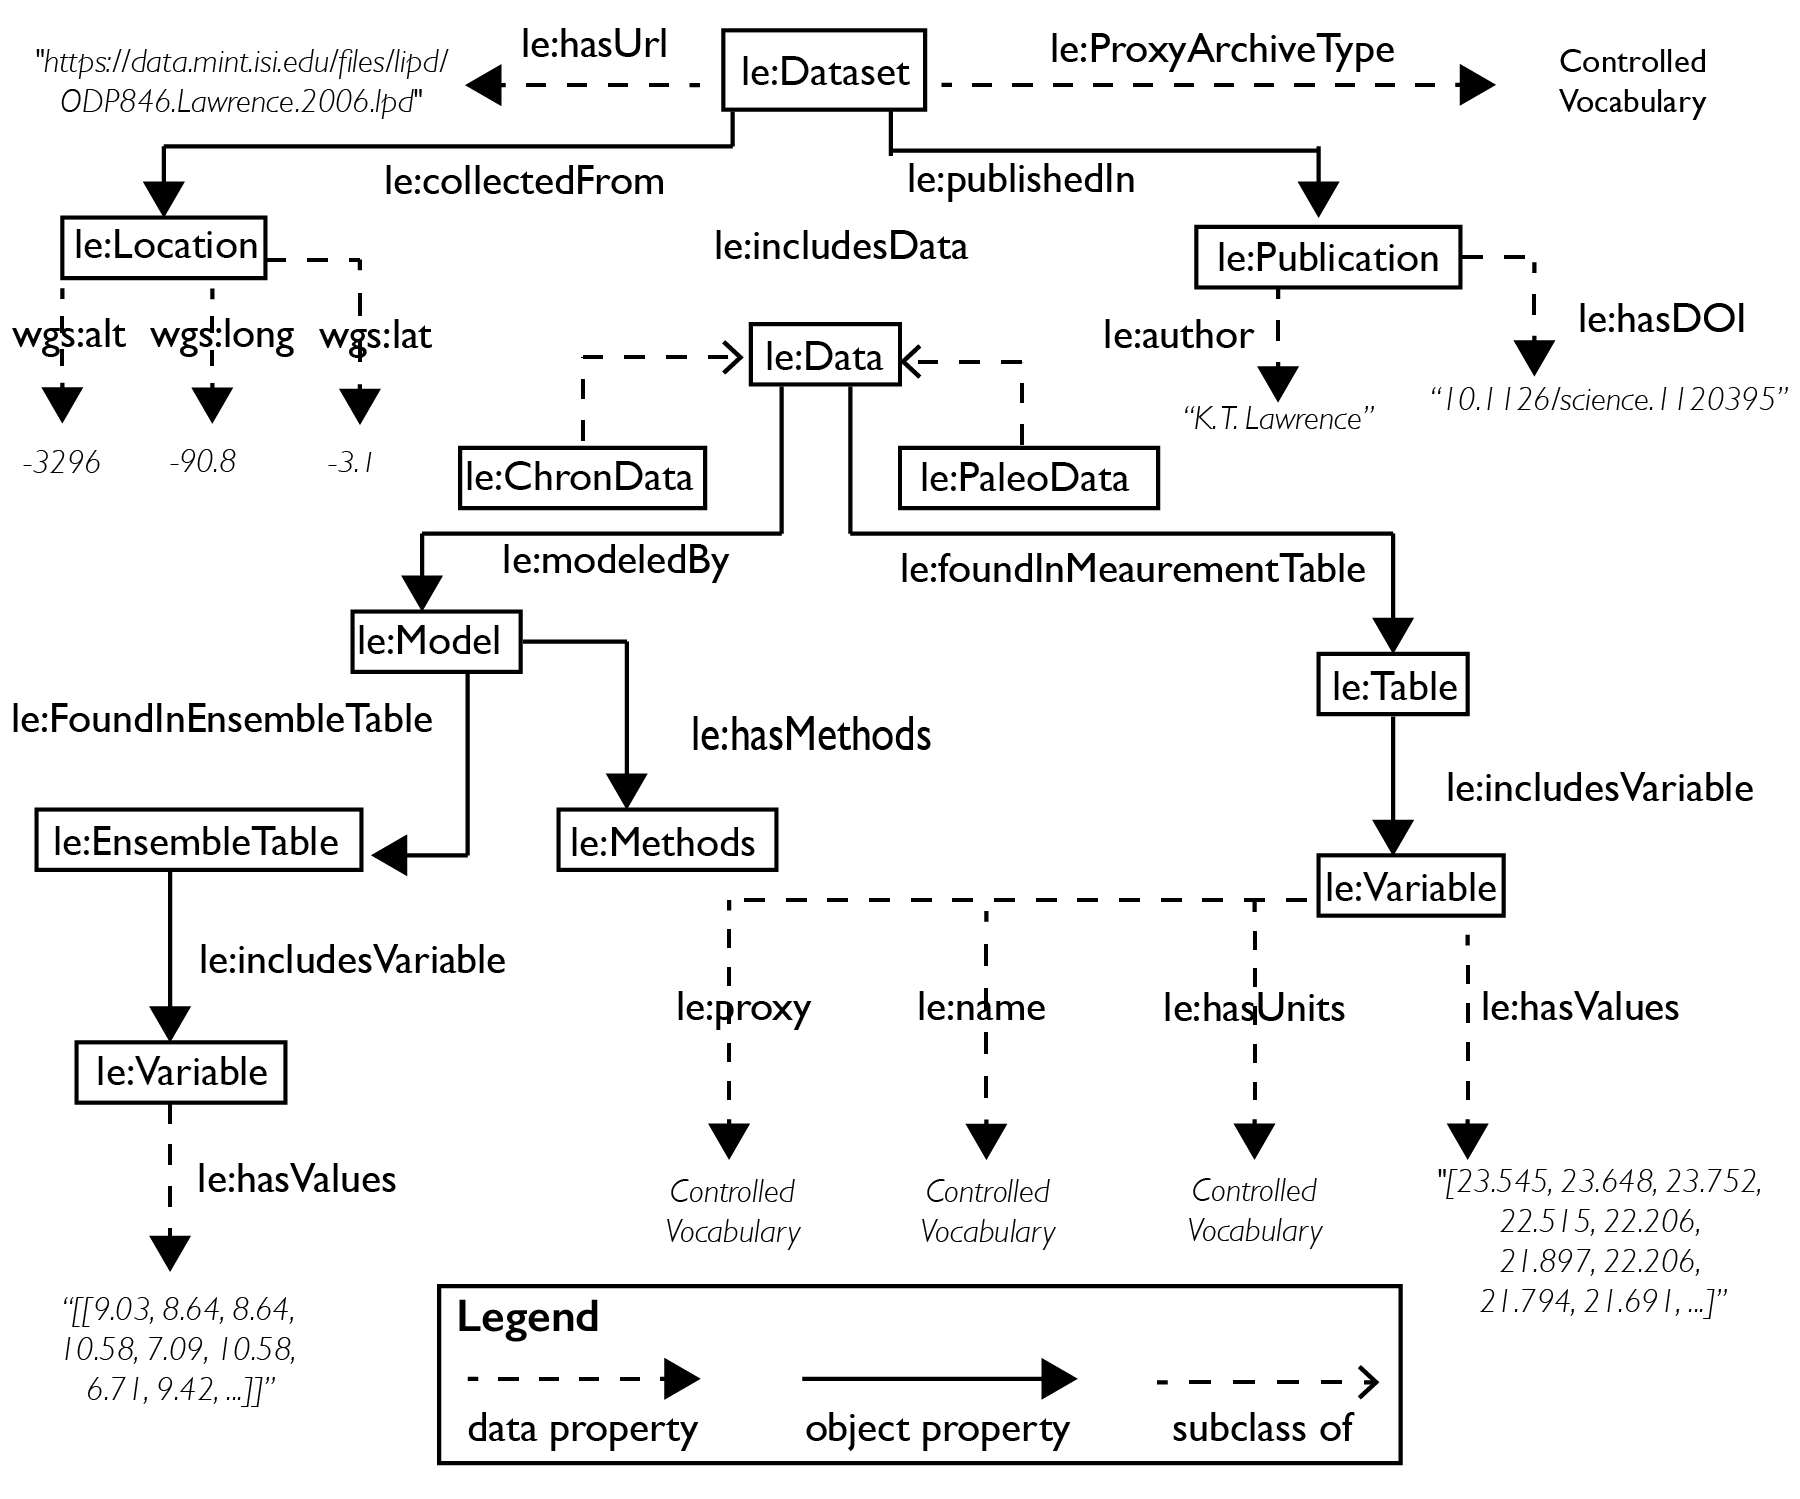

As you can see, the top class is the `Dataset` class. 

### Why is this information relevant now?

At first glance, OOP and ontologies serve two different purposes. However, they function is a very similar fashion: a class (or object) that can be manipulated through its properties (or methods). We used this resemblance to help us create editing functions for `PyLiPD`. In short, each class in the ontology was made into an object into `PyLiPD` and each property was given functionalities to read/write/edit the property value. 

This is how the `Dataset` object was created and your entry point to editing LiPD files.

### How is `Dataset` different from the `LiPD` class?

At first glance, the two classes are very similar as they contained the data and metadata for paleoclimate datasets as a graph. However, the functions attached to the `Dataset` class are meant for editing while those associated with the `LiPD` class are meant for querying and manipulation. Separating the two also ensure that files are not overwritten by mistake. 

However, if you prefer to use the Python APIs for each property to loop over various files, the `Dataset` class may be more useful to you. This option requires knowledge of the ontology and the LiPD stucture.  

### Goals

* Create a Dataset class from an existing file
* Retrieve information from the file

Reading Time: 5 minutes

### Keywords

LiPD, LinkedEarth Ontology, Object-Oriented Programming

### Pre-requisites

An understanding of OOP and the LinkedEarth Ontology:
* The [Linked Earth Core Ontology](https://linked.earth/ontology/core/2.0.0/index-en.html) provides the main concepts and relationships to describe a paleoclimate dataset and its values.
* The [Archive Type Ontology](https://linked.earth/ontology/archive/2.0.0/index-en.html) describes a taxonomy of the most common types of archives (e.g., `Coral`, `Glacier Ice`).
* The [Paleo Variables Ontology](https://linked.earth/ontology/paleo_variables/2.0.0/index-en.html) describes a taxonomy of the most common types of paleo variables.
* The [Paleo Proxy Ontology](https://linked.earth/ontology/paleo_proxy/2.0.0/index-en.html) describes a taxonomy of the most common types of paleo proxies.
* The [Paleo Units Ontology](https://linked.earth/ontology/paleo_units/2.0.0/index-en.html) describes a taxonomy of the most common types of paleo units.
* The [Interpretation Ontology](https://linked.earth/ontology/interpretation/2.0.0/index-en.html) describes a taxonomy of the most common interpretations.
* The [Instrument Ontology](https://linked.earth/ontology/instrument/2.0.0/index-en.html) describes a taxonomy of the most common instrument for taking measurements.
* The Chron Variables Ontology describes a taxonomy of the most common types of chron variables. *Under Construction*.
* The Chron Proxy Ontology describes a taxonomy of the most common types of chron proxies. *Under Construction*.
* The Chron Units Ontology describes a taxonomy of the most common types of chron units. *Under Construction*.

### Relevant Packages

pylipd

## Data Description

This notebook uses the following datasets, in LiPD format:

* Nurhati, I. S., Cobb, K. M., & Di Lorenzo, E. (2011). Decadal-scale SST and salinity variations in the central tropical Pacific: Signatures of natural and anthropogenic climate change. Journal of Climate, 24(13), 3294–3308. doi:10.1175/2011jcli3852.1

* Lawrence, K. T., Liu, Z. H., & Herbert, T. D. (2006). Evolution of the eastern tropical Pacific through Plio-Pleistocne glaciation. Science, 312(5770), 79-83.

## Demonstration

Let's import the `LiPD` and `Dataset` classes:

In [1]:
from pylipd.classes.dataset import Dataset
from pylipd.lipd import LiPD

# Pandas for data
import pandas as pd
import pyleoclim as pyleo

For the purpose of this demonstration, let's open the dataset from Nurhati et al. (2011). 

In [2]:
D = LiPD()

data_path = '../data/Ocn-Palmyra.Nurhati.2011.lpd'
D.load(data_path)

Loading 1 LiPD files


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 35.86it/s]

Loaded..


### Creating a `Dataset` object

Convert to a `Dataset` object using the `get_datasets` method. By default, This method returns a list. Since we have only one dataset, we select the first item:

In [3]:
ds = D.get_datasets()[0]

### Obtaining information about the `Dataset`

#### Get Dataset level information

You can now access information about the dataset using Python APIs. The methods to do so are named as `get`+ the name of the class/property. For instance, to get the name of the dataset, you should use the `getName` function:

In [4]:
name = ds.getName()
name

'Ocn-Palmyra.Nurhati.2011'

In doubt, consult the [documentation](https://pylipd.readthedocs.io/en/latest/api.html#lipd-classes) for the various objects. The documentation is light on these since they were created directly from the ontology. 

#### Location

Remember that data properties such as `Name` have a range of `string`, `float`, `integer` and represent the leaf in the graph. However, you may need to dig into the graph to obtain that answer. For instance, let's have a look at the geographical coordinates for the site:

In [5]:
geo = ds.getLocation()
type(geo)

pylipd.classes.location.Location

As you can see, the function returns another [object called `Location`](https://pylipd.readthedocs.io/en/latest/api.html#pylipd.classes.location.Location) with its own functions that corresponds to the properties attached to the `Location` class in the LinkedEarth Ontology. Let's get the latitute and longitude information:

In [6]:
lat = geo.getLatitude()
lon = geo.getLongitude()

coord = [lon, lat]
print(coord)

[-162.13, 5.87]


#### Data

Let's access the data contained in `PaleoData` and load them in a `Pandas DataFrame`:

In [7]:
data_tables = []

for paleoData in ds.getPaleoData(): # loop over the various PaleoData objects
    for table in paleoData.getMeasurementTables(): #get the measurement tables
        df = table.getDataFrame(use_standard_names=True) # grab the data and standardize the variable names
        data_tables.append(df)

In [8]:
print("There are", len(data_tables), " tables in the dataset")

There are 2  tables in the dataset


In [9]:
data1 = data_tables[0]
data1.head()

,d18O,year
0,0.39,1998.21
1,0.35,1998.13
2,0.35,1998.04
3,0.35,1997.96
4,0.36,1997.88


Note that the basic information about the variables are stored in the attributes of the DataFrame. The dictionary key for each of the variable corresponds to the data hearder. 

In [10]:
data_tables[0].attrs

{'d18O': {'@id': 'http://linked.earth/lipd/Ocn-Palmyra.Nurhati.2011.paleo2.measurementTable1.Ocean2kHR_162.d18O',
  'archiveType': 'Coral',
  'number': 1,
  'hasMaxValue': 1.26,
  'hasMeanValue': 0.7670059435,
  'hasMedianValue': 0.78,
  'hasMinValue': 0.07,
  'missingValue': 'NaN',
  'variableName': 'd18O',
  'notes': 'd18Osw (residuals calculated from coupled SrCa and d18O measurements)',
  'proxy': 'd18O',
  'resolution': {'@id': 'http://linked.earth/lipd/Ocn-Palmyra.Nurhati.2011.paleo2.measurementTable1.Ocean2kHR_162.d18O.Resolution',
   'hasMaxValue': 0.09,
   'hasMeanValue': 0.08333085502,
   'hasMedianValue': 0.08,
   'hasMinValue': 0.08,
   'units': 'yr AD'},
  'hasStandardVariable': 'd18O',
  'units': 'permil',
  'TSid': 'Ocean2kHR_162',
  'variableType': 'measured',
  'proxyObservationType': 'd18O',
  'measurementTableMD5': '3d028342178e079acb4366bfedf54a77',
  'sensorSpecies': 'lutea',
  'useInGlobalTemperatureAnalysis': False,
  'wDSPaleoUrl': 'https://www1.ncdc.noaa.gov/pu

You can use [`Pyleoclim`](https://pyleoclim-util.readthedocs.io/en/latest/) to plot the data and conduct further analyses:

Time axis values sorted in ascending order


(<Figure size 1000x400 with 1 Axes>,
 <Axes: xlabel='Time [years CE]', ylabel='d18O [per mil]'>)

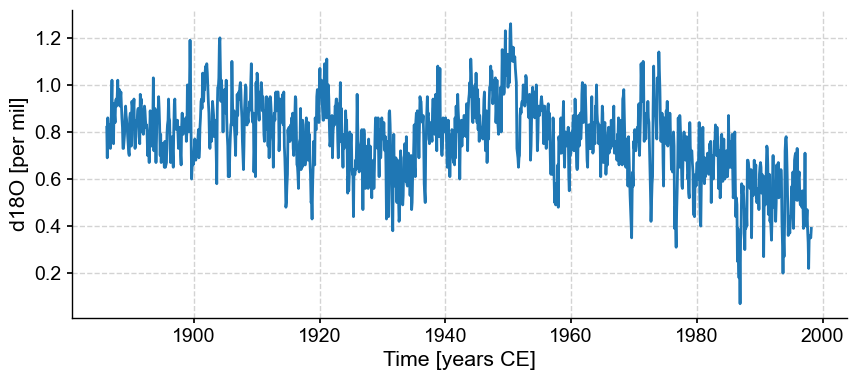

In [11]:
ts = pyleo.Series(time = data1['year'], value = data1['d18O'],
                 time_name = 'year', time_unit = 'CE',
                 value_name = 'd18O', value_unit = 'per mil')

ts.plot()

<div class="alert alert-block alert-info">
You can use the attributes associated with each DataFrame to loop over several tables and create `pyleoclim.Series` objects.
</div>

### Understanding the relationships among classes

As mentioned, the classes and methods present in the `pylipd.classes` module are derived from the LinkedEarth Ontology. You can alwasy refer to it when in doubt. We also provide a handy diagram here illustrating the relationship:

![image](https://github.com/LinkedEarth/pylipd/blob/main/examples/notebooks/UMLDiagram.png?raw=true)

### Working with age ensembles

For the purpose of this demonstration, let's load the record from Lawrence et al. (2006), which contains an ensemble table, and return it into a DataSet object:

In [12]:
lipd = LiPD()
lipd.load('../data/ODP846.Lawrence.2006.lpd')

ds_ens = lipd.get_datasets()[0]

Loading 1 LiPD files


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.36it/s]

Loaded..


Now let's grab the ensemble data information:

In [13]:
df_ens = [] # create an empty list to store all ensemble tables across models. 

for cd in ds_ens.getChronData():
    for model in cd.getModeledBy():
        for etable in model.getEnsembleTables():
            df_ens.append(etable.getDataFrame())

Let's have a look at the resulting DataFrame:

In [14]:
df_ens[0].head()

,depth,age
0,0.12,"[4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, ..."
1,0.23,"[9.03, 8.64, 8.64, 10.58, 7.09, 10.58, 6.71, 9..."
2,0.33,"[11.74, 11.35, 10.96, 12.12, 10.58, 11.74, 11...."
3,0.43,"[13.28, 13.28, 12.51, 13.67, 12.9, 13.28, 13.2..."
4,0.53,"[14.83, 14.83, 15.22, 15.6, 14.83, 15.6, 14.83..."


As will be the case with all EnsembleTable, the resulting DataFrame contains two columns: (1) depth and (2) age. The possible values for each depth is then stored as a numpy vector. 

The DataFrame also contains relevant metadata information stored as attributes:

In [15]:
df_ens[0].attrs

{'depth': {'@id': 'http://linked.earth/lipd/chron0model0ensemble0.PYTGOFY4KZD.depth',
  'number': 1,
  'variableName': 'depth',
  'hasStandardVariable': 'depth',
  'units': 'm',
  'TSid': 'PYTGOFY4KZD'},
 'age': {'@id': 'http://linked.earth/lipd/chron0model0ensemble0.PYTUHE3XLGQ.age',
  'number': '[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 1